# Importing Libraries

In [1]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Download Fashion MNIST Dataset

In [2]:
(train_images, train_labels), (test_images, test_labels)= tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
len(train_images), len(train_labels), len(test_images), len(test_labels)

(60000, 60000, 10000, 10000)

In [9]:
train_images[0].shape, type(train_images)

((28, 28), numpy.ndarray)

# Visualize Image

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

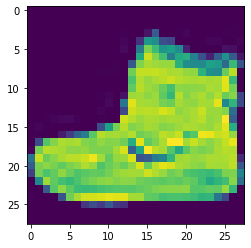

In [8]:
np.set_printoptions(linewidth=200)
print(train_labels[0])
print(train_images[0])

plt.imshow(train_images[0])

# Normalize Data

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Design and Train the Model

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [12]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [13]:
history = model.fit(x=train_images,
                    y=train_labels,
                    epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4924 - accuracy: 0.8263
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3717 - accuracy: 0.8657
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3351 - accuracy: 0.8777
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3118 - accuracy: 0.8865
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2913 - accuracy: 0.8924


In [16]:
history.history['loss'], history.history['accuracy']

([0.4924420118331909,
  0.3716515898704529,
  0.335114985704422,
  0.31182965636253357,
  0.2913084030151367],
 [0.8262666463851929,
  0.8657333254814148,
  0.8776500225067139,
  0.8865166902542114,
  0.8924333453178406])

In [14]:
model_evaluation = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3727 - accuracy: 0.8643


In [19]:
print('Loss: ', model_evaluation[0])
print('Accuracy: ', model_evaluation[1])

Loss:  0.37265917658805847
Accuracy:  0.864300012588501


# Exercise 01

In [21]:
classifications = model.predict(test_images)
classifications

array([[1.3633174e-05, 1.2523897e-07, 2.0466723e-06, ..., 2.9565047e-02, 2.9826104e-05, 9.6076685e-01],
       [3.5609268e-05, 1.0384229e-12, 9.9818307e-01, ..., 4.4875933e-16, 6.5417960e-10, 1.2710682e-15],
       [4.3177955e-05, 9.9995601e-01, 2.1917577e-08, ..., 1.4789227e-14, 8.0000576e-11, 2.2668631e-12],
       ...,
       [3.5888512e-02, 1.4729513e-07, 2.3105381e-02, ..., 4.0068872e-07, 9.0224314e-01, 2.9477237e-08],
       [1.4524536e-06, 9.9996150e-01, 2.4216243e-07, ..., 2.6295455e-09, 5.6781557e-09, 7.5180457e-09],
       [1.8537807e-04, 2.6758556e-07, 1.2919893e-04, ..., 3.8567744e-02, 1.7523154e-03, 2.2523264e-04]], dtype=float32)

In [24]:
print(classifications[0])
print(test_labels[0])
print(np.argmax(classifications[0]))

[1.3633174e-05 1.2523897e-07 2.0466723e-06 9.2345113e-07 2.0085317e-06 9.6140746e-03 5.5691230e-06 2.9565047e-02 2.9826104e-05 9.6076685e-01]
9
9


In [22]:
# 10000 test images, 10 classes (probability for each class)
classifications.shape

(10000, 10)

# Exercise 02

* Train model for 1024 dense layers neuron
* Training will take more time but more accurate as well

In [25]:
# Download the dataset
(train_images, train_labels), (test_images, test_labels)= tf.keras.datasets.fashion_mnist.load_data()

# Normalize dataset
train_images = train_images / 255.0
test_images = test_images / 255.0

# Design a Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile the Model
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# Fit the Model
history = model.fit(x=train_images,
                    y=train_labels,
                    epochs=5)

# Evaluate the model
model_evaluation = model.evaluate(test_images, test_labels)
print(model_evaluation)

# Predict the test_images using model
classifications = model.predict(test_images)

# Get the labels of first image
print(classifications[0])
print(test_labels[0])
print(np.argmax(classifications[0]))

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4762 - accuracy: 0.8289
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3594 - accuracy: 0.8696
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3215 - accuracy: 0.8825
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2985 - accuracy: 0.8900
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3322 - accuracy: 0.8817
[0.33224284648895264, 0.8816999793052673]
[1.5358182e-08 9.7889368e-09 5.2371720e-09 6.0875766e-10 3.2578731e-10 2.6587152e-04 8.6117140e-08 5.5214897e-02 1.7823866e-07 9.4451892e-01]
9
9


# Exercise 03

* What would happen if you remove the Flatten() layer. Why do you think that's the case?

* It will give an error.
* First layer should be same shape as data

In [26]:
# Download the dataset
(train_images, train_labels), (test_images, test_labels)= tf.keras.datasets.fashion_mnist.load_data()

# Normalize dataset
train_images = train_images / 255.0
test_images = test_images / 255.0

# Design a Model
model = tf.keras.models.Sequential([
    # tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile the Model
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# Fit the Model
history = model.fit(x=train_images,
                    y=train_labels,
                    epochs=5)

# Evaluate the model
model_evaluation = model.evaluate(test_images, test_labels)
print(model_evaluation)

# Predict the test_images using model
classifications = model.predict(test_images)

# Get the labels of first image
print(classifications[0])
print(test_labels[0])
print(np.argmax(classifications[0]))

Epoch 1/5


ValueError: ignored

# Exercise 04

* Last layer neuron should be same as number of classes

In [27]:
# Download the dataset
(train_images, train_labels), (test_images, test_labels)= tf.keras.datasets.fashion_mnist.load_data()

# Normalize dataset
train_images = train_images / 255.0
test_images = test_images / 255.0

# Design a Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])

# Compile the Model
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# Fit the Model
history = model.fit(x=train_images,
                    y=train_labels,
                    epochs=5)

# Evaluate the model
model_evaluation = model.evaluate(test_images, test_labels)
print(model_evaluation)

# Predict the test_images using model
classifications = model.predict(test_images)

# Get the labels of first image
print(classifications[0])
print(test_labels[0])
print(np.argmax(classifications[0]))

Epoch 1/5


InvalidArgumentError: ignored

# Exercise 05

* Adding another extra layers

In [29]:
# Download the dataset
(train_images, train_labels), (test_images, test_labels)= tf.keras.datasets.fashion_mnist.load_data()

# Normalize dataset
train_images = train_images / 255.0
test_images = test_images / 255.0

# Design a Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile the Model
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# Fit the Model
history = model.fit(x=train_images,
                    y=train_labels,
                    epochs=5)

# Evaluate the model
model_evaluation = model.evaluate(test_images, test_labels)
print(model_evaluation)

# Predict the test_images using model
classifications = model.predict(test_images)

# Get the labels of first image
print(classifications[0])
print(test_labels[0])
print(np.argmax(classifications[0]))

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4712 - accuracy: 0.8309
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3576 - accuracy: 0.8685
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3228 - accuracy: 0.8802
Epoch 4/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2943 - accuracy: 0.8904
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3484 - accuracy: 0.8762
[0.34841009974479675, 0.8762000203132629]
[6.4716405e-06 1.8436638e-05 2.0436157e-06 8.9700088e-06 1.8445915e-06 7.7762708e-02 2.8590196e-06 9.1747813e-02 3.2340786e-06 8.3044559e-01]
9
9


# Exercise 06

* Train for more epochs

In [30]:
# Download the dataset
(train_images, train_labels), (test_images, test_labels)= tf.keras.datasets.fashion_mnist.load_data()

# Normalize dataset
train_images = train_images / 255.0
test_images = test_images / 255.0

# Design a Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile the Model
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# Fit the Model
history = model.fit(x=train_images,
                    y=train_labels,
                    epochs=15)

# Evaluate the model
model_evaluation = model.evaluate(test_images, test_labels)
print(model_evaluation)

# Predict the test_images using model
classifications = model.predict(test_images)

# Get the labels of first image
print(classifications[0])
print(test_labels[0])
print(np.argmax(classifications[0]))

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4980 - accuracy: 0.8249
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3709 - accuracy: 0.8663
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3340 - accuracy: 0.8782
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3103 - accuracy: 0.8872
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2938 - accuracy: 0.8916
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2772 - accuracy: 0.8983
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2661 - accuracy: 0.9014
Epoch 8/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2568 - accuracy: 0.9045
Epoch 9/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2466 - accuracy: 0.9083
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.235

# Exercise 07

* Try model without normalizing data

In [31]:
# Download the dataset
(train_images, train_labels), (test_images, test_labels)= tf.keras.datasets.fashion_mnist.load_data()

# Normalize dataset
# train_images = train_images / 255.0
# test_images = test_images / 255.0

# Design a Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile the Model
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# Fit the Model
history = model.fit(x=train_images,
                    y=train_labels,
                    epochs=5)

# Evaluate the model
model_evaluation = model.evaluate(test_images, test_labels)
print(model_evaluation)

# Predict the test_images using model
classifications = model.predict(test_images)

# Get the labels of first image
print(classifications[0])
print(test_labels[0])
print(np.argmax(classifications[0]))

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 3.2880 - accuracy: 0.7126
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6436 - accuracy: 0.7725
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5714 - accuracy: 0.7992
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5252 - accuracy: 0.8207
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.5163 - accuracy: 0.8237
[0.5162848830223083, 0.8237000107765198]
[1.24568164e-17 3.08428529e-21 0.00000000e+00 1.03672457e-17 7.19880038e-30 1.94217619e-02 3.64641402e-19 1.59341823e-02 3.94288620e-08 9.64644015e-01]
9
9


# Exercise 08

* Adding Callback

In [32]:
# Download the dataset
(train_images, train_labels), (test_images, test_labels)= tf.keras.datasets.fashion_mnist.load_data()

# Normalize dataset
train_images = train_images / 255.0
test_images = test_images / 255.0

# Create callback class
class myCallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('loss') < 0.4:
      print('\n Cancelling Training...')
      self.model.stop_training = True


callbacks = myCallbacks()

# Design a Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile the Model
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# Fit the Model
history = model.fit(x=train_images,
                    y=train_labels,
                    epochs=5,
                    callbacks=[callbacks])

# Evaluate the model
model_evaluation = model.evaluate(test_images, test_labels)
print(model_evaluation)

# Predict the test_images using model
classifications = model.predict(test_images)

# Get the labels of first image
print(classifications[0])
print(test_labels[0])
print(np.argmax(classifications[0]))

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4754 - accuracy: 0.8321
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3586 - accuracy: 0.8684

 Cancelling Training...
313/313 [==============================] - 1s 2ms/step - loss: 0.3698 - accuracy: 0.8666
[0.36981239914894104, 0.866599977016449]
[5.6728091e-05 9.3127892e-06 2.0331692e-05 5.2660430e-06 1.6756947e-05 7.6295242e-02 3.3943354e-05 1.5798120e-01 1.0569855e-03 7.6452422e-01]
9
9
